In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os.path import join
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [119]:
import random
import warnings
warnings.filterwarnings('ignore')

In [113]:
random.randint(0,32)

30

# For description dataset
# If target value =0 it is cosidered as normal
# If it is 1 it is cosidered as outliers

In [2]:
df = pd.read_csv(join("data",'train_reuter_877_44_1.csv'),header=None)
test = pd.read_csv(join("data",'test_reuter_877_44_1.csv'),header=None)

# feature name 변환
columns = [f"w{i}" for i in range(len(df.columns)-1)]
columns.append('is_normal')

# feature name 적용
df.columns = columns
test.columns = columns

# 마지막 label is_abnormal column 제거
data = df.iloc[:,:-1]
label = df.iloc[:,[-1]]

#테스트데이터도 마지막 colum 제거 후 레이블만 따로 뻄
test_data = test.iloc[:,:-1]
test_label = test.iloc[:,[-1]]


# 기존은 0이 정상 1이 이상치 변경 0->1.  1->-1 
#테스트데이터 적용
test_label = test_label.replace(1,-1)
test_label = test_label.replace(0,1)

#train data 작용
label = label.replace(0,1)


In [3]:
# df_2 = pd.read_csv(join("data",'train_reuter_org_1.csv'),header=None)
df = pd.read_csv(join("data",'train_reuter_877_44_1.csv'),header=None)
test = pd.read_csv(join("data",'test_reuter_877_44_1.csv'),header=None)


In [4]:
#df_2 = pd.read_csv("train_reuter_877_44_1.csv",header=None)
# df_2 = pd.read_csv("train_reuter_org_1.csv",header=None)

In [5]:
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.80564,1.03990,1.05160,1.06240,1.06300,1.07220,1.08180,1.09360,1.09570,1.09600,...,1.14010,1.14030,1.14110,1.14120,1.14190,1.14360,1.14380,1.14380,1.14410,0
1,0.94974,0.95941,1.00590,1.00800,1.03210,1.03550,1.04340,1.04350,1.05560,1.05700,...,1.10190,1.10480,1.10550,1.10550,1.10590,1.10700,1.10820,1.11020,1.11170,0
2,0.49153,0.65380,0.70683,0.70803,0.81065,0.85390,0.85520,0.87345,0.90402,0.91982,...,1.10650,1.10660,1.10890,1.11180,1.11390,1.11760,1.11980,1.12120,1.12140,0
3,0.35153,0.58909,0.73177,0.73334,0.77836,0.82453,0.83517,0.83915,0.85313,0.86826,...,0.98292,0.98389,0.99304,0.99457,1.00010,1.00410,1.00500,1.01530,1.01860,0
4,0.65377,0.96085,0.96292,0.98122,0.98278,0.99948,0.99996,1.00170,1.01250,1.01920,...,1.09060,1.09160,1.09200,1.09420,1.09520,1.09730,1.10030,1.10130,1.10130,0
5,0.92654,0.98616,1.03620,1.05940,1.06530,1.06680,1.06810,1.07280,1.07380,1.07510,...,1.13430,1.13520,1.13780,1.13820,1.13970,1.14120,1.14130,1.14160,1.14200,0
6,0.52838,0.85345,0.88262,0.89068,0.91130,0.97044,0.99184,1.00280,1.00460,1.02240,...,1.11960,1.12420,1.12470,1.12870,1.12940,1.12960,1.13200,1.13520,1.13780,0
7,0.49038,0.78243,0.87752,0.89555,0.91822,0.92213,0.97251,0.97571,0.99286,1.01250,...,1.08450,1.08510,1.08800,1.08860,1.08890,1.08970,1.08980,1.09010,1.09050,0
8,0.57544,1.03560,1.04940,1.06900,1.07500,1.07540,1.08100,1.10100,1.10340,1.10620,...,1.14700,1.14840,1.14900,1.14960,1.15010,1.15010,1.15010,1.15050,1.15470,0
9,0.87647,0.98766,1.04660,1.06610,1.07250,1.07470,1.07630,1.08020,1.08360,1.09470,...,1.14360,1.14380,1.14390,1.14410,1.14560,1.14710,1.14760,1.14760,1.14840,0


In [6]:
# cl = [f"w{i}" for i in range(len(test.columns)-1)]
# cl.append('is_anomal')
# test.columns = cl

columns = [f"w{i}" for i in range(len(df.columns)-1)]
columns.append('is_normal')


df.columns = columns

In [7]:
test.columns = columns


In [8]:
test['is_normal'].unique()

array([0, 1])

In [9]:
df['is_normal'].unique()

array([0])

In [10]:
data = df.iloc[:,:-1]
label = df.iloc[:,[-1]]

In [11]:
train_label = label.to_numpy()
train_label = train_label.reshape(-1)

In [12]:
test_data = test.iloc[:,:-1]
test_label = test.iloc[:,[-1]]

# test data 레이블 변환 1:normal , -1:abnormal

In [13]:
test_label = test_label.replace(1,-1)
test_label = test_label.replace(0,1)

# 기존에 정상은 0이지만 1로 변환 나중 sklearn을 대비

In [14]:
label = label.replace(0,1)

In [16]:
data.shape , test_data.shape

((2923, 44), (4903, 44))

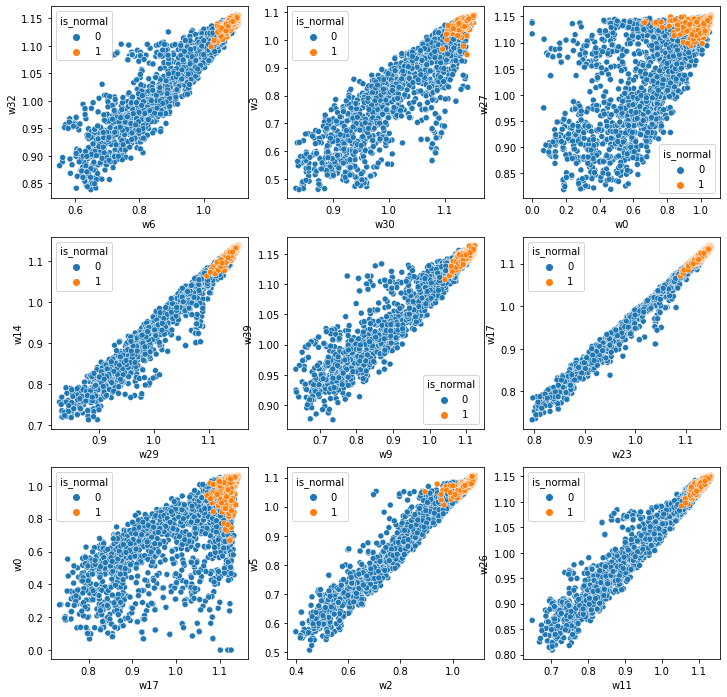

In [121]:
fig, ax = plt.subplots(3,3, figsize=(12,12))

for i in range(3):
    for j in range(3):
        a = random.randint(0,len(data.columns)-1)
        b = random.randint(0,len(data.columns)-1)
        sns.scatterplot(test[f"w{a}"] , test[f"w{b}"] , hue = test.is_normal ,ax=ax[j][i])
        

In [ ]:
clf = IsolationForest(random_state=47, behaviour='new')

param_grid = {'n_estimators': list(range(100, 800, 5)), 
              'max_samples': list(range(100, 500, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features': [5,10,15], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10, 20, 30]}

In [52]:
forest = IsolationForest(n_estimators=1000 , contamination=0.1)

In [53]:
forest.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [54]:
train_predict = forest.predict(data)

In [55]:
train_predict

array([ 1,  1,  1, ...,  1, -1,  1])

In [56]:
train_label

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
list(train_predict).count(1) / train_predict.shape[0]

0.8997605200136846

# Test process

In [58]:
test_predict = forest.predict(test_data)

In [59]:
test_predict

array([ 1,  1,  1, ...,  1, -1,  1])

In [60]:
list(test_predict).count(1) / test_predict.shape[0]

0.8819090352845197

In [61]:
test_label['is_normal'].value_counts()

 1    2924
-1    1979
Name: is_normal, dtype: int64

In [62]:
list(test_predict).count(-1)

579

In [63]:
test_cmat = confusion_matrix(test_label,test_predict)

In [64]:
test_cmat

array([[ 258, 1721],
       [ 321, 2603]])

In [67]:
y_pred = forest.score_samples(test_data)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(test_label,y_pred)

0.49294351981717754

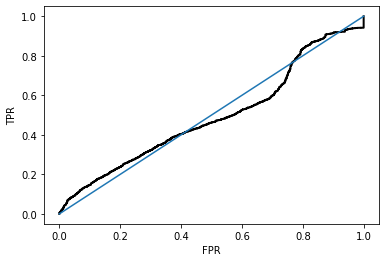

In [66]:
fpr, tpr, thresholds = roc_curve(test_label,y_pred)
plt.plot(fpr, tpr, 'k-', lw=2)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()